In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [17]:
class Cell:
    def __init__(self, color, rgb, power, pos):
        self.color = color
        self.rgb = rgb
        self.power = power
        self.up,self.down,self.left,self.right = 0,0,0,0
        self.pos = pos
        self.neighbors = []

    def atk(self):
        if self.color == "red":
            self.up = 35
            self.down = 35
            self.left = 15
            self.right = 15
        
        if self.color == "blu":
            self.up = 15
            self.down = 15
            self.left = 35
            self.right = 35
            
        self.up,self.down,self.left,self.right = np.random.multinomial(self.power,[1/4.] * 4)
    
    def getNeighbors(self,cells):
        north = ( self.pos[0]  , self.pos[1] - 1 )
        east = ( self.pos[0] + 1, self.pos[1] )
        south = ( self.pos[0] , self.pos[1] + 1 )
        west = ( self.pos[0] - 1, self.pos[1] )
    
        for (i,j) in [north,east,south,west]:
            if not outOfBounds( (i,j) ):
                self.neighbors.append( cells[i][j] )
        
        return self.neighbors
    
    def updateState(self,oldCells):
        for neighbor in oldCells[self.pos[0]][self.pos[1]].neighbors:
            if neighbor.color != self.color:
                enemyAtks = [neighbor.up,neighbor.right,neighbor.down,neighbor.left]
                
                myAtks = [self.up,self.right,self.down,self.left]
                fights = list(zip(myAtks,enemyAtks))
                wins = list(map((lambda tup : tup[0] >= tup[1]),fights))
                if sum(wins) < 2:
                    self.color = neighbor.color
                    self.rgb = neighbor.rgb

In [18]:
def initCells(cells):
    for i in range(height):
        for j in range(width):
            cells[i][j].neighbors = cells[i][j].getNeighbors(cells)
            
def evalCells(newCells,oldCells):
    for i in range(height):
        for j in range(width):
            oldCells[i][j].atk()
            oldCells[i][j]
            cells[i][j].updateState(oldCells)

In [19]:
def outOfBounds(position):
    if ((position[0] >= 0 and position[0] < height) 
        and (position[1] >= 0 and position[1] < width)):
        return False
    return True

In [20]:
def cellsToCanvas(cells,canvas,height,width):
    for i in range(height):
        for j in range(width):
            canvas[i][j] = cells[i][j].rgb

In [21]:
height,width = 300,300

cells = []
oldCells = []
for i in range(height):
    row = []
    for j in range(width):
        if j < (width/2):
            row.append( Cell("red", [255,0,0], 100, (i,j)) )
        else:
            row.append( Cell("blu", [0,0,255], 100, (i,j)) )
        
    cells.append(row)
    oldCells.append(row)

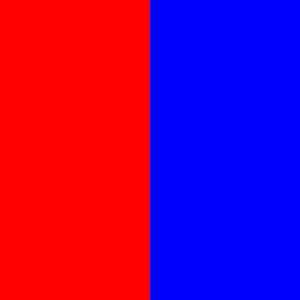

In [22]:
canvas = np.zeros([height, width, 3], dtype=np.uint8)
cellsToCanvas(cells,canvas,height,width)
Image.fromarray(canvas)

In [23]:
initCells(cells)

for i in range(10):
    evalCells(cells,oldCells)

TypeError: evalCells() missing 1 required positional argument: 'oldCells'

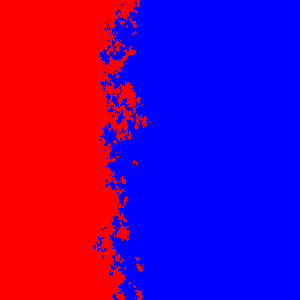

In [52]:
cellsToCanvas(cells,canvas,height,width)
Image.fromarray(canvas)

In [ ]:
    for j in range(width):
